**DENGAN K-FOLD CROSSVAL SERTA RUNNING 1 BY 1 CV**

In [1]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import graphviz

In [2]:
# Import Dataset 
df = pd.read_csv(r'D:\Skripsi\Sc\2. Reza\final_data.csv')
df.head()      # Menampilkan data teratas

,X1,X3,X4,X5,X6,Y1,X2
0,3.0,0,0,0,0,1,1
1,2.0,0,0,0,0,0,3
2,2.0,0,0,0,0,1,2
3,2.0,0,0,0,0,0,3
4,1.0,0,0,0,0,0,1


In [3]:
# Split Into X and y
X = df.drop('Y1', axis=1)
y = df['Y1']

In [4]:
# K-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)

fold_test = []
fold_pred = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    x_train, x_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    
    classifier = RandomForestClassifier(criterion='gini',
                                        n_estimators=100,
                                        max_features=5,
                                        min_samples_leaf=10, 
                                        n_jobs=1, 
                                        random_state=1, 
                                        oob_score=True)
    
    train_init = time.time()            # Time of Running Training data at K-Fold
    classifier.fit(x_train, y_train)
    train_time = time.time() - train_init

    test_init = time.time()             # Time of Running Testing data at K-Fold
    prediction = classifier.predict(x_test)
    test_time = time.time() - test_init
    
    accuracy = accuracy_score(y_test, prediction)
    print(f'Fold: {fold+1} | Accuracy: {accuracy} | Train Time: {train_time} | Test Time: {test_time}')
    
    # Append test data and predictions to the lists
    fold_test.extend(y_test)
    fold_pred.extend(prediction)

# Convert the lists to Pandas Series
all_fold_test = pd.Series(fold_test, name='Actual')
all_fold_pred = pd.Series(fold_pred, name='Predicted')

Fold: 1 | Accuracy: 1.0 | Train Time: 0.43355703353881836 | Test Time: 0.020224571228027344
Fold: 2 | Accuracy: 1.0 | Train Time: 0.3685896396636963 | Test Time: 0.019331932067871094
Fold: 3 | Accuracy: 0.9444444444444444 | Train Time: 0.3597133159637451 | Test Time: 0.02013993263244629
Fold: 4 | Accuracy: 1.0 | Train Time: 0.3376643657684326 | Test Time: 0.02162003517150879
Fold: 5 | Accuracy: 0.9444444444444444 | Train Time: 0.340116024017334 | Test Time: 0.019723176956176758
Fold: 6 | Accuracy: 0.9444444444444444 | Train Time: 0.35025644302368164 | Test Time: 0.022301197052001953
Fold: 7 | Accuracy: 0.9166666666666666 | Train Time: 0.36229395866394043 | Test Time: 0.02014613151550293
Fold: 8 | Accuracy: 1.0 | Train Time: 0.33600878715515137 | Test Time: 0.01993703842163086
Fold: 9 | Accuracy: 1.0 | Train Time: 0.4110243320465088 | Test Time: 0.020308256149291992
Fold: 10 | Accuracy: 1.0 | Train Time: 0.3918008804321289 | Test Time: 0.024433612823486328


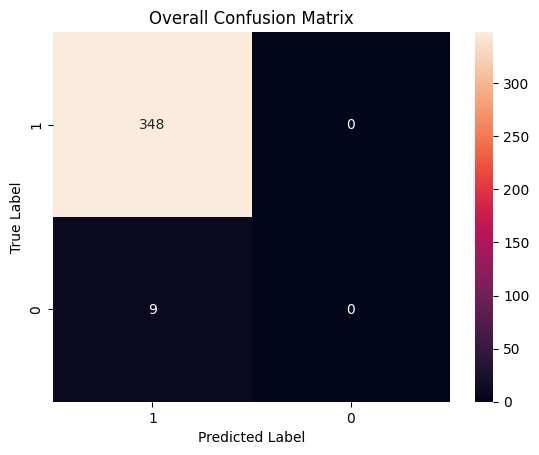

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       348
           1       0.00      0.00      0.00         9

    accuracy                           0.97       357
   macro avg       0.49      0.50      0.49       357
weighted avg       0.95      0.97      0.96       357

Overall Accuracy: 0.97


In [5]:
# Generate overall confusion matrix
overall_cm = confusion_matrix(all_fold_test, all_fold_pred)
df_overall_cm = pd.DataFrame(overall_cm, index=df['Y1'].unique(), columns=df['Y1'].unique())
sns.heatmap(df_overall_cm, annot=True, fmt=".0f")
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print overall classification report
print("Overall Classification Report:")
print(classification_report(all_fold_test, all_fold_pred, zero_division=0))

# Print overall accuracy
overall_accuracy = accuracy_score(all_fold_test, all_fold_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")